# IMPORT LIBRARIES

In [1]:
pip install matplotlib --upgrade

In [2]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.10.6


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode
plt.style.use('dark_background')
init_notebook_mode(connected=True)
import seaborn as sns
from matplotlib.offsetbox import OffsetImage,AnnotationBbox
%matplotlib inline


#READ CSV FILE

In [18]:
df = pd.read_csv('billionaires.csv')

#DATA WRANGLING

I like to start by looking at some rows to see the columns in the dataframe, the info function to know the datatypes and decide if any type needs to me changed, identify null values and decide how to deal with them

In [19]:
df.sample(5)

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,...,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
2448,Daniel Hirschfeld,1465,2014,1948,Buckle,relation,apparel,new,0,male,...,0.000000e+00,North America,executive,1.1,0,True,0,not inherited,True,True
613,Jan Koum,202,2014,2009,WhatsApp,founder,mobile app,new,38,male,...,0.000000e+00,North America,founder non-finance,6.8,New Sectors,True,Technology-Computer,not inherited,True,True
191,Gustavo Cisneros,64,2001,1929,Cisneros Group,relation,media,new,55,male,...,1.230000e+11,Latin America,inherited,5.3,Non-Traded Sectors,True,Media,father,True,True
1848,Erwin Franz Mueller,869,2014,1953,Mueller,founder,retail,new,81,male,...,0.000000e+00,Europe,founder non-finance,2.0,Non-Traded Sectors,True,"Retail, Restaurant",not inherited,True,True
1381,Lin Yu-lin,466,2014,1965,Hong Tai Group,founder,real estate,new,78,male,...,0.000000e+00,East Asia,self-made finance,3.4,Financial,True,Real Estate,not inherited,True,True


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2614 entries, 0 to 2613
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      2614 non-null   object 
 1   rank                      2614 non-null   int64  
 2   year                      2614 non-null   int64  
 3   company.founded           2614 non-null   int64  
 4   company.name              2576 non-null   object 
 5   company.relationship      2568 non-null   object 
 6   company.sector            2591 non-null   object 
 7   company.type              2578 non-null   object 
 8   demographics.age          2614 non-null   int64  
 9   demographics.gender       2580 non-null   object 
 10  location.citizenship      2614 non-null   object 
 11  location.country code     2614 non-null   object 
 12  location.gdp              2614 non-null   float64
 13  location.region           2614 non-null   object 
 14  wealth.t

In [21]:
df.isnull().sum()

,0
name,0
rank,0
year,0
company.founded,0
company.name,38
company.relationship,46
company.sector,23
company.type,36
demographics.age,0
demographics.gender,34


In [22]:
df.describe()

,rank,year,company.founded,demographics.age,location.gdp,wealth.worth in billions
count,2614.000000,2614.000000,2614.000000,2614.000000,2.614000e+03,2614.000000
mean,599.672533,2008.411630,1924.711936,53.341239,1.769103e+12,3.531943
std,467.885695,7.483598,243.776546,25.333320,3.547083e+12,5.088813
min,1.000000,1996.000000,0.000000,-42.000000,0.000000e+00,1.000000
25%,215.000000,2001.000000,1936.000000,47.000000,0.000000e+00,1.400000
50%,430.000000,2014.000000,1963.000000,59.000000,0.000000e+00,2.000000
75%,988.000000,2014.000000,1985.000000,70.000000,7.250000e+11,3.500000
max,1565.000000,2014.000000,2012.000000,98.000000,1.060000e+13,76.000000


In [23]:
zero_counts = df.apply(lambda x: (x == 0).sum())
print(zero_counts)

name                           0
rank                           0
year                           0
company.founded               40
company.name                   0
company.relationship           0
company.sector                 0
company.type                   0
demographics.age             383
demographics.gender            0
location.citizenship           0
location.country code          0
location.gdp                1665
location.region                0
wealth.type                    0
wealth.worth in billions       0
wealth.how.category            0
wealth.how.from emerging       0
wealth.how.industry            0
wealth.how.inherited           0
wealth.how.was founder         0
wealth.how.was political       0
dtype: int64


There are many values entered as 0, that will affect tendencies, so I'll have to handle them as null values and deal with them

In [24]:
df.replace(0, np.nan, inplace=True)


In [25]:
df.isnull().sum()

,0
name,0
rank,0
year,0
company.founded,40
company.name,38
company.relationship,46
company.sector,23
company.type,36
demographics.age,383
demographics.gender,34


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2614 entries, 0 to 2613
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      2614 non-null   object 
 1   rank                      2614 non-null   int64  
 2   year                      2614 non-null   int64  
 3   company.founded           2574 non-null   float64
 4   company.name              2576 non-null   object 
 5   company.relationship      2568 non-null   object 
 6   company.sector            2591 non-null   object 
 7   company.type              2578 non-null   object 
 8   demographics.age          2231 non-null   float64
 9   demographics.gender       2580 non-null   object 
 10  location.citizenship      2614 non-null   object 
 11  location.country code     2614 non-null   object 
 12  location.gdp              949 non-null    float64
 13  location.region           2614 non-null   object 
 14  wealth.t

There are columns I don't need to get the answers I want to get from this dataset, I'll get rid of them. I've also decided I'll get rid of rows with the null values as they're not significant sample

In [27]:
df= df.drop(['location.country code','location.gdp','wealth.how.from emerging', 'wealth.how.was founder', 'wealth.how.was political'], axis=1)

In [29]:
df=df.dropna()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2200 entries, 0 to 2613
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      2200 non-null   object 
 1   rank                      2200 non-null   int64  
 2   year                      2200 non-null   int64  
 3   company.founded           2200 non-null   float64
 4   company.name              2200 non-null   object 
 5   company.relationship      2200 non-null   object 
 6   company.sector            2200 non-null   object 
 7   company.type              2200 non-null   object 
 8   demographics.age          2200 non-null   float64
 9   demographics.gender       2200 non-null   object 
 10  location.citizenship      2200 non-null   object 
 11  location.region           2200 non-null   object 
 12  wealth.type               2200 non-null   object 
 13  wealth.worth in billions  2200 non-null   float64
 14  wealth.how.ca

when working in python using dots in the column names is not advisable as it can create conflict when using the language. It is better to us '_' instead or any other prefered notation

In [31]:
df.rename(columns = {'company.founded':'company_founded', 'company.name':'company_name', 'company.relationship':'company_relationship', 'company.sector':'sector', 'company.type':'company_type','demographics.age':'age', 'demographics.gender':'gender', 'location.citizenship':'country', 'location.region':'region','wealth.type':'wealth_type', 'wealth.worth in billions':'wealthworth_inbillions', 'wealth.how.category':'wealth_how_category', 'wealth.how.industry':'industry', 'wealth.how.inherited':'wealth_how_inherited'}, inplace = True)

This dataset needs a lot of cleaning, by looking at the unique values of a column I can tell there are different spellings for the same value, this would alter the analysis

In [35]:
df['company_relationship'].unique()

array(['founder', 'founder/chairman', 'relation', 'CEO', 'chairman',
       'investor', 'founder and CEO', 'Relation', 'founder/CEO', 'owner',
       'chairman of management committee', 'founder and chairman',
       'Chairman and Chief Executive Officer', 'general director',
       'executive chairman', 'Chairman/founder', 'founder, chairman, ceo',
       'former chairman and CEO', 'relation and chairman',
       'investor/founder', 'partner', 'president', 'investor and  CEO',
       'founder CEO owner', 'Chairman/shareholder', 'Vice President',
       'chairman of the board', 'founder/relation', 'ceo', 'investor ',
       'founder/vice chairman', 'Chairman', 'Honorary President for Life',
       'former CEO', 'inherited', 'vice-chairman', 'owner and vice chair',
       'founder/president', 'relation/vice chairman', 'Chairman, CEO',
       'employee', "head of Microsoft's application software group",
       'chariman', 'Exectuitve Director', 'vice chairman',
       'relation and ceo',

In [36]:
df["company_relationship"] = df["company_relationship"].replace(['Relation'], 'relation')
df["company_relationship"] = df["company_relationship"].replace(['CEO', 'Chief Executive'], 'ceo')
df["company_relationship"] = df["company_relationship"].replace(['founder and CEO', 'founder and ceo'], 'founder/ceo')
df["company_relationship"] = df["company_relationship"].replace(['founder and chairman', 'Chairman/founder', 'founder and chairwoman'], 'founder/chairman')
df["company_relationship"] = df["company_relationship"].replace(['chariman', 'chairman of the board', 'chairwoman', 'Chairman', 'chairwomen'], 'chairman')

In [37]:
df['sector'].unique()

array([' Software', ' Finance', ' Communications', 'technology',
       'Fashion', 'real estate', ' software', 'banking and insurance',
       'construction/real estate/banking', '  Oil refining',
       ' Oil refining', 'retail', ' retail', ' casinos', 'cars',
       'cosmetics', ' fashion', 'media', 'luxury goods',
       'oil, railroad, investments', ' finance', 'furniture',
       ' technology', 'oil', 'chocolates', 'banking',
       'commodities (sugar, cement flour)', 'groceries',
       'computer services', 'investment (via holding company)', 'apparel',
       'hedge funds', 'mail order retail', 'pharmaceuticals',
       'construction, hotels, gaming', 'investment banking', 'candy',
       'investment banking/beer', 'glasses', 'aluminum, oil',
       'food packaging', 'brewery', 'metals', 'textiles', 'software',
       'coal', 'mining', 'brokerage/banking', 'construction', 'steel',
       'construction/insurance', 'consumer loans',
       'energy, retail, manufacturing', 'fashio

In [38]:
df["sector"] = df["sector"].replace(['aigriculture', 'agricultural', 'agribusiness'], 'agriculture')
df["sector"] = df["sector"].replace([' software', ' Software'], 'software')
df["sector"] = df["sector"].replace(['  Oil refining', ' Oil refining'], 'oil refining')
df["sector"] = df["sector"].replace([' retail'], 'retail')
df["sector"] = df["sector"].replace([' finance', ' Finance'], 'finance')
df["sector"] = df["sector"].replace([' Communications'], 'communications')
df["sector"] = df["sector"].replace([' technology'], 'technology')
df["sector"] = df["sector"].replace(['commodities (sugar'], 'commodities')

In [39]:
df["company_type"].unique()


array(['new', 'privatization', ' new', 'aquired', ' acquired', 'acquired',
       'new/aquired', 'new ', 'new division', 'merger', 'franchise',
       'state owned enterprise', 'new, privitization', 'franchise rights',
       'subsidiary'], dtype=object)

In [40]:
df["company_type"] = df["company_type"].replace([' new', 'new '], 'new')
df["company_type"] = df["company_type"].replace(['aquired', ' acquired'], 'acquired')
df["company_type"] = df["company_type"].replace(['privitization'], 'privatization')
df["company_type"] = df["company_type"].replace(['franchise rights'], 'franchise')

In [41]:
df['industry'].unique()

array(['Technology-Computer', 'Consumer', 'Media', 'Retail, Restaurant',
       'Real Estate', 'Hedge funds', 'Money Management',
       'Diversified financial', 'Constrution', 'Technology-Medical',
       'Non-consumer industrial', 'Energy', 'Mining and metals',
       'Private equity/leveraged buyout', 'Other', '0', 'Venture Capital'],
      dtype=object)

In [42]:
df['country'].unique()

array(['United States', 'Mexico', 'Spain', 'Hong Kong', 'Taiwan',
       'Saudi Arabia', 'Japan', 'Germany', 'France', 'Sweden', 'Canada',
       'Malaysia', 'Italy', 'Singapore', 'Nigeria', 'Switzerland',
       'Brazil', 'Russia', 'India', 'United Kingdom', 'Australia',
       'Thailand', 'Kuwait', 'Turkey', 'Chile', 'Venezuela', 'China',
       'Argentina', 'Greece', 'Colombia', 'Cyprus', 'South Africa',
       'Ireland', 'Philippines', 'South Korea', 'Czech Republic',
       'Israel', 'Netherlands', 'Denmark', 'Lebanon', 'Austria',
       'Indonesia', 'New Zealand', 'Egypt', 'Bermuda', 'Portugal',
       'United Arab Emirates', 'Georgia', 'Norway', 'Belgium', 'Angola',
       'Swaziland', 'Poland', 'Finland', 'Algeria', 'Ukraine', 'Morocco',
       'Peru', 'Guernsey', 'Kazakhstan', 'Macau', 'Vietnam', 'Monaco',
       'Romania', 'Oman', 'Nepal', 'Uganda', 'Lithuania', 'Tanzania'],
      dtype=object)

In [43]:
df.columns

Index(['name', 'rank', 'year', 'company_founded', 'company_name',
       'company_relationship', 'sector', 'company_type', 'age', 'gender',
       'country', 'region', 'wealth_type', 'wealthworth_inbillions',
       'wealth_how_category', 'industry', 'wealth_how_inherited'],
      dtype='object')

In [44]:
#the minimun age is -42 so I'll change numbers to be absolute
df['age']= abs(df['age'])

In [45]:
print('Number of duplicate values are : ', df.duplicated().sum())

Number of duplicate values are :  0


In [46]:
#let's see how the data for one row is looking
df.loc[8]

,8
name,Amancio Ortega
rank,3
year,2014
company_founded,1975.0
company_name,Zara
company_relationship,founder
sector,Fashion
company_type,new
age,77.0
gender,male


In [47]:
df.dtypes

,0
name,object
rank,int64
year,int64
company_founded,float64
company_name,object
company_relationship,object
sector,object
company_type,object
age,float64
gender,object


In [48]:
df.describe()

,rank,year,company_founded,age,wealthworth_inbillions
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,640.925000,2009.770455,1957.667727,62.523636,3.735545
std,476.052835,6.799910,40.894379,13.209419,5.434689
min,1.000000,1996.000000,1610.000000,7.000000,1.000000
25%,233.500000,2001.000000,1942.000000,53.000000,1.400000
50%,490.000000,2014.000000,1968.000000,62.000000,2.100000
75%,1046.000000,2014.000000,1987.000000,72.000000,3.600000
max,1565.000000,2014.000000,2012.000000,98.000000,76.000000


In [ ]:
df.loc[df['age'] == 7]

,name,rank,year,company_founded,company_name,company_relationship,sector,company_type,age,gender,country,region,wealth_type,wealthworth_inbillions,wealth_how_category,industry,wealth_how_inherited
1065,Kenichi Mabuchi,354,1996,1946.0,Mabuchi Motor Company,founder,electric motors,new,7.0,male,Japan,East Asia,founder non-finance,1.1,Traded Sectors,Non-consumer industrial,not inherited


In [52]:
df['age'] = df['age'].replace([7], 70)

In [57]:
df[df['age']==12]

,name,rank,year,company_founded,company_name,company_relationship,sector,company_type,age,gender,country,region,wealth_type,wealthworth_inbillions,wealth_how_category,industry,wealth_how_inherited
788,Albert von Thurn und Taxis,258,1996,1615.0,von Thurn and Taxis family,relation,"postal service, beverages",new,12.0,male,Germany,Europe,inherited,1.5,Financial,Money Management,5th generation or longer


In [58]:
#deleting outliers
df = df.drop(labels=788, axis=0)

#EDA

In [60]:
df.describe()

,rank,year,company_founded,age,wealthworth_inbillions
count,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000
mean,641.099136,2009.776717,1957.823556,62.575261,3.736562
std,476.091026,6.795109,40.245061,13.115905,5.435716
min,1.000000,1996.000000,1610.000000,21.000000,1.000000
25%,233.000000,2001.000000,1942.000000,53.000000,1.400000
50%,490.000000,2014.000000,1968.000000,62.000000,2.100000
75%,1046.000000,2014.000000,1987.000000,72.000000,3.600000
max,1565.000000,2014.000000,2012.000000,98.000000,76.000000


##What are the top 10 countries with the highest number of billionaires?

In [64]:
billionairesPerCountry= df.groupby("country")["name"].count().reset_index()
billionairesPerCountry

,country,name
0,Algeria,1
1,Angola,1
2,Argentina,6
3,Australia,31
4,Austria,10
...,...,...
64,United Arab Emirates,1
65,United Kingdom,53
66,United States,804
67,Venezuela,7


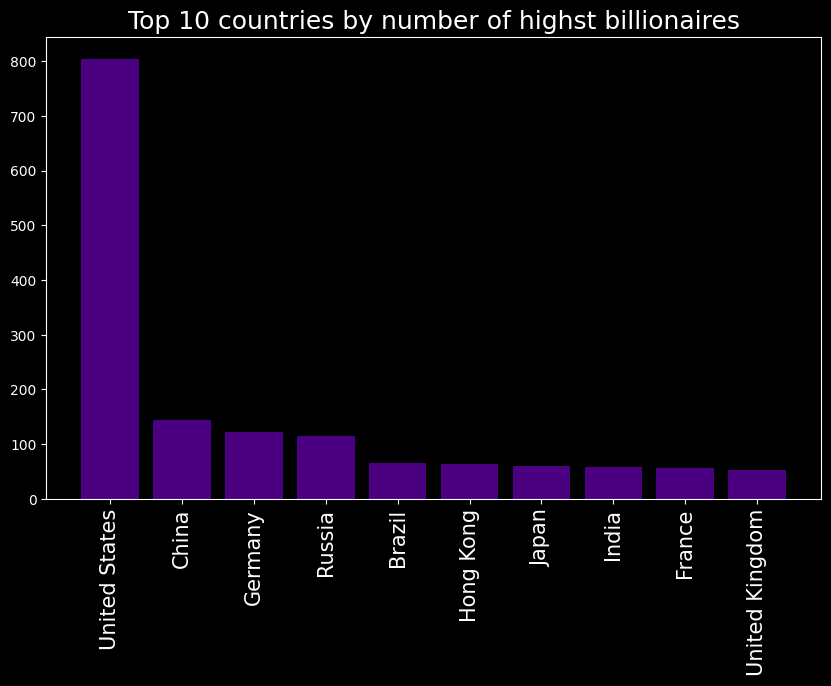

In [70]:
data=df['country'].value_counts().head(10)

lenth=range(len(data))
plt.figure(figsize=(10,6))
plt.bar(data.index,data.values,color='indigo')
plt.ylabel("", color='white', size=15)
plt.xlabel("", color='white', size=15)
plt.xticks(lenth,data.index, color='white', fontsize=15, rotation=90)
plt.title("Top 10 countries by number of highst billionaires",fontsize=18)
plt.show()

##What industries/sectors are most successful?

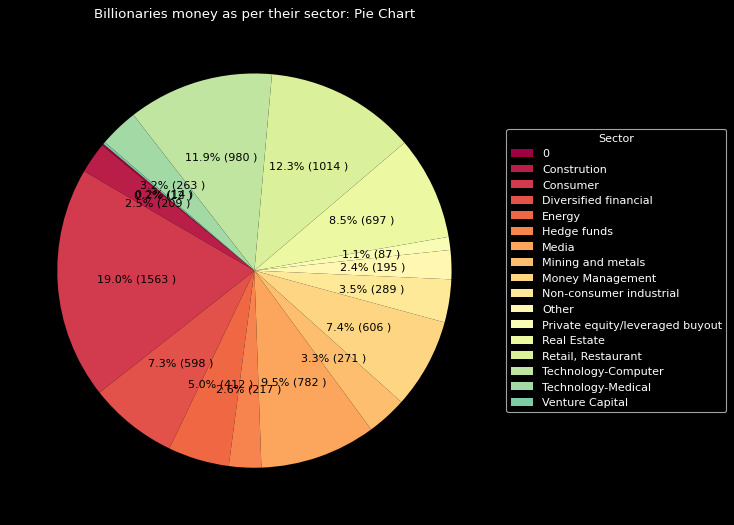

In [73]:
#https://www.kaggle.com/code/ramjasmaurya/billionaires
vals="wealthworth_inbillions"
df2 = df.groupby('industry')['wealthworth_inbillions'].sum().reset_index(name='counts')

# Draw Plot
fig, ax = plt.subplots(figsize=(20, 8), subplot_kw=dict(aspect="equal"), dpi= 80)

data = df2['counts']
categories = df2['industry']
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data,
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="black"),startangle=140,colors=colors[:len(vals)])

# Decoration
ax.legend(wedges, categories, title="Sector", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=0)
ax.set_title("Billionaries money as per their sector: Pie Chart")
plt.show()

##What is the gender distribution?

/tmp/ipython-input-378622842.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



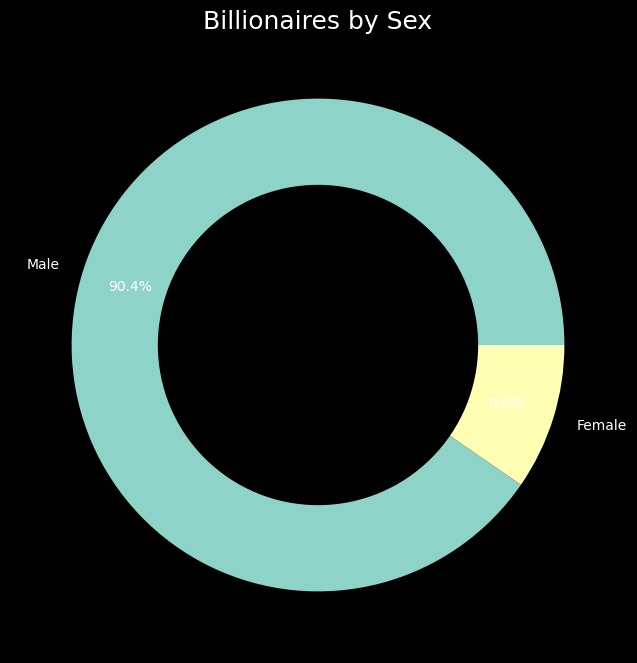

In [75]:
data=df['gender'].value_counts()
labl=["Male","Female"]
d=[data[0],data[1]]

plt.figure(figsize=(8,8))
plt.pie(d,autopct='%1.1f%%',labels=labl,pctdistance=0.80)

centre_circle = plt.Circle((0, 0), 0.65, fc='black')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
plt.title("Billionaires by Sex",fontsize=18)
plt.show()

##What age range represents the highest and lowest number of billionaires?

In [77]:
df['age_group'] = pd.cut(df['age'], bins = [12, 30, 50, 70, 100], include_lowest = True, labels = ['18-30', '30-50', '50-70','70+'])

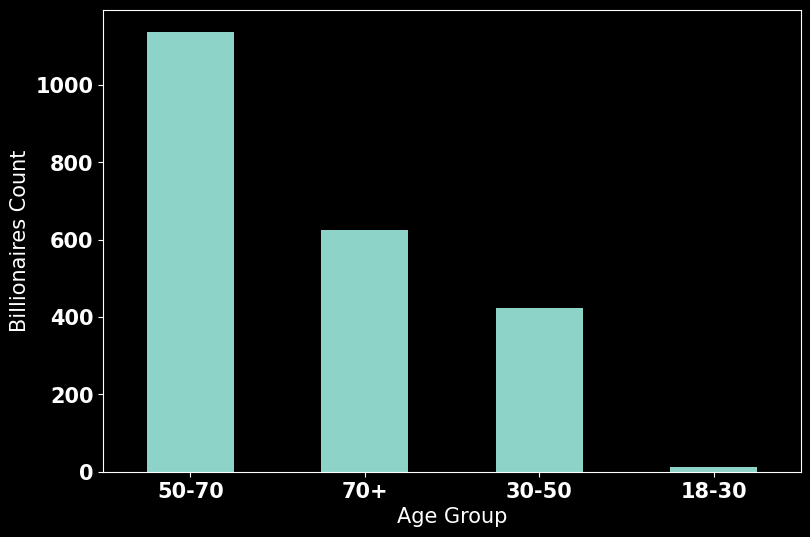

In [79]:
df['age_group'].value_counts().plot(kind='bar', figsize=(9,6))
plt.xlabel("Age Group", fontsize=15, color='white')
plt.ylabel("Billionaires Count", fontsize=15, color='white')
plt.yticks(size=15, weight="bold", x=0, color="white")
plt.xticks(size=15, weight="bold", x=0, color="white", rotation = 0)
plt.show()

#CONCLUSIONS

- When looking at a dataset of billionaries for every 9 men there is 1 woman
- a minimal proportion of the population are billionares before the age of 30
- United States has the highest number of billionaires in the world
